### Clustering Assignment: HELP-NGO

In [241]:
#Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [242]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
# Reading the "Country-data.csv" dataset

df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [244]:
#Checking the columns' datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [245]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [246]:
df.shape

(167, 10)

### Data Preparation

In [247]:
# Checking for missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<b> As there are no missing values, no columns need to be dropped or manipulated. We can proceed for data analysis

In [248]:
# Checking the datatypes

df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

<b> All the columns have consistent datatypes. So no need of any type conversions.

### Derived Metrics:

In [249]:
# Dropping the "Country" column to check those numerical columns which can be manipulated 
#to make sense for further analysis.

df_no_country = df.copy()
df_country = df_no_country.pop("country")
df_no_country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Let us convert the values of few important columns: "health","imports", "income" with respect to the "gdpp" for better the data to make better sense.

In [250]:
df["health"] = df["health"] * df["gdpp"] / 100
df["imports"] = df["imports"] * df["gdpp"] / 100
df["income"] = df["income"] * df["gdpp"] / 100

In [251]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200


In [252]:
# Checking for duplicates

df.loc[df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


<b> No duplicates in the data. Data is perfectly ready to proceed for visualization!

### Data Visualization

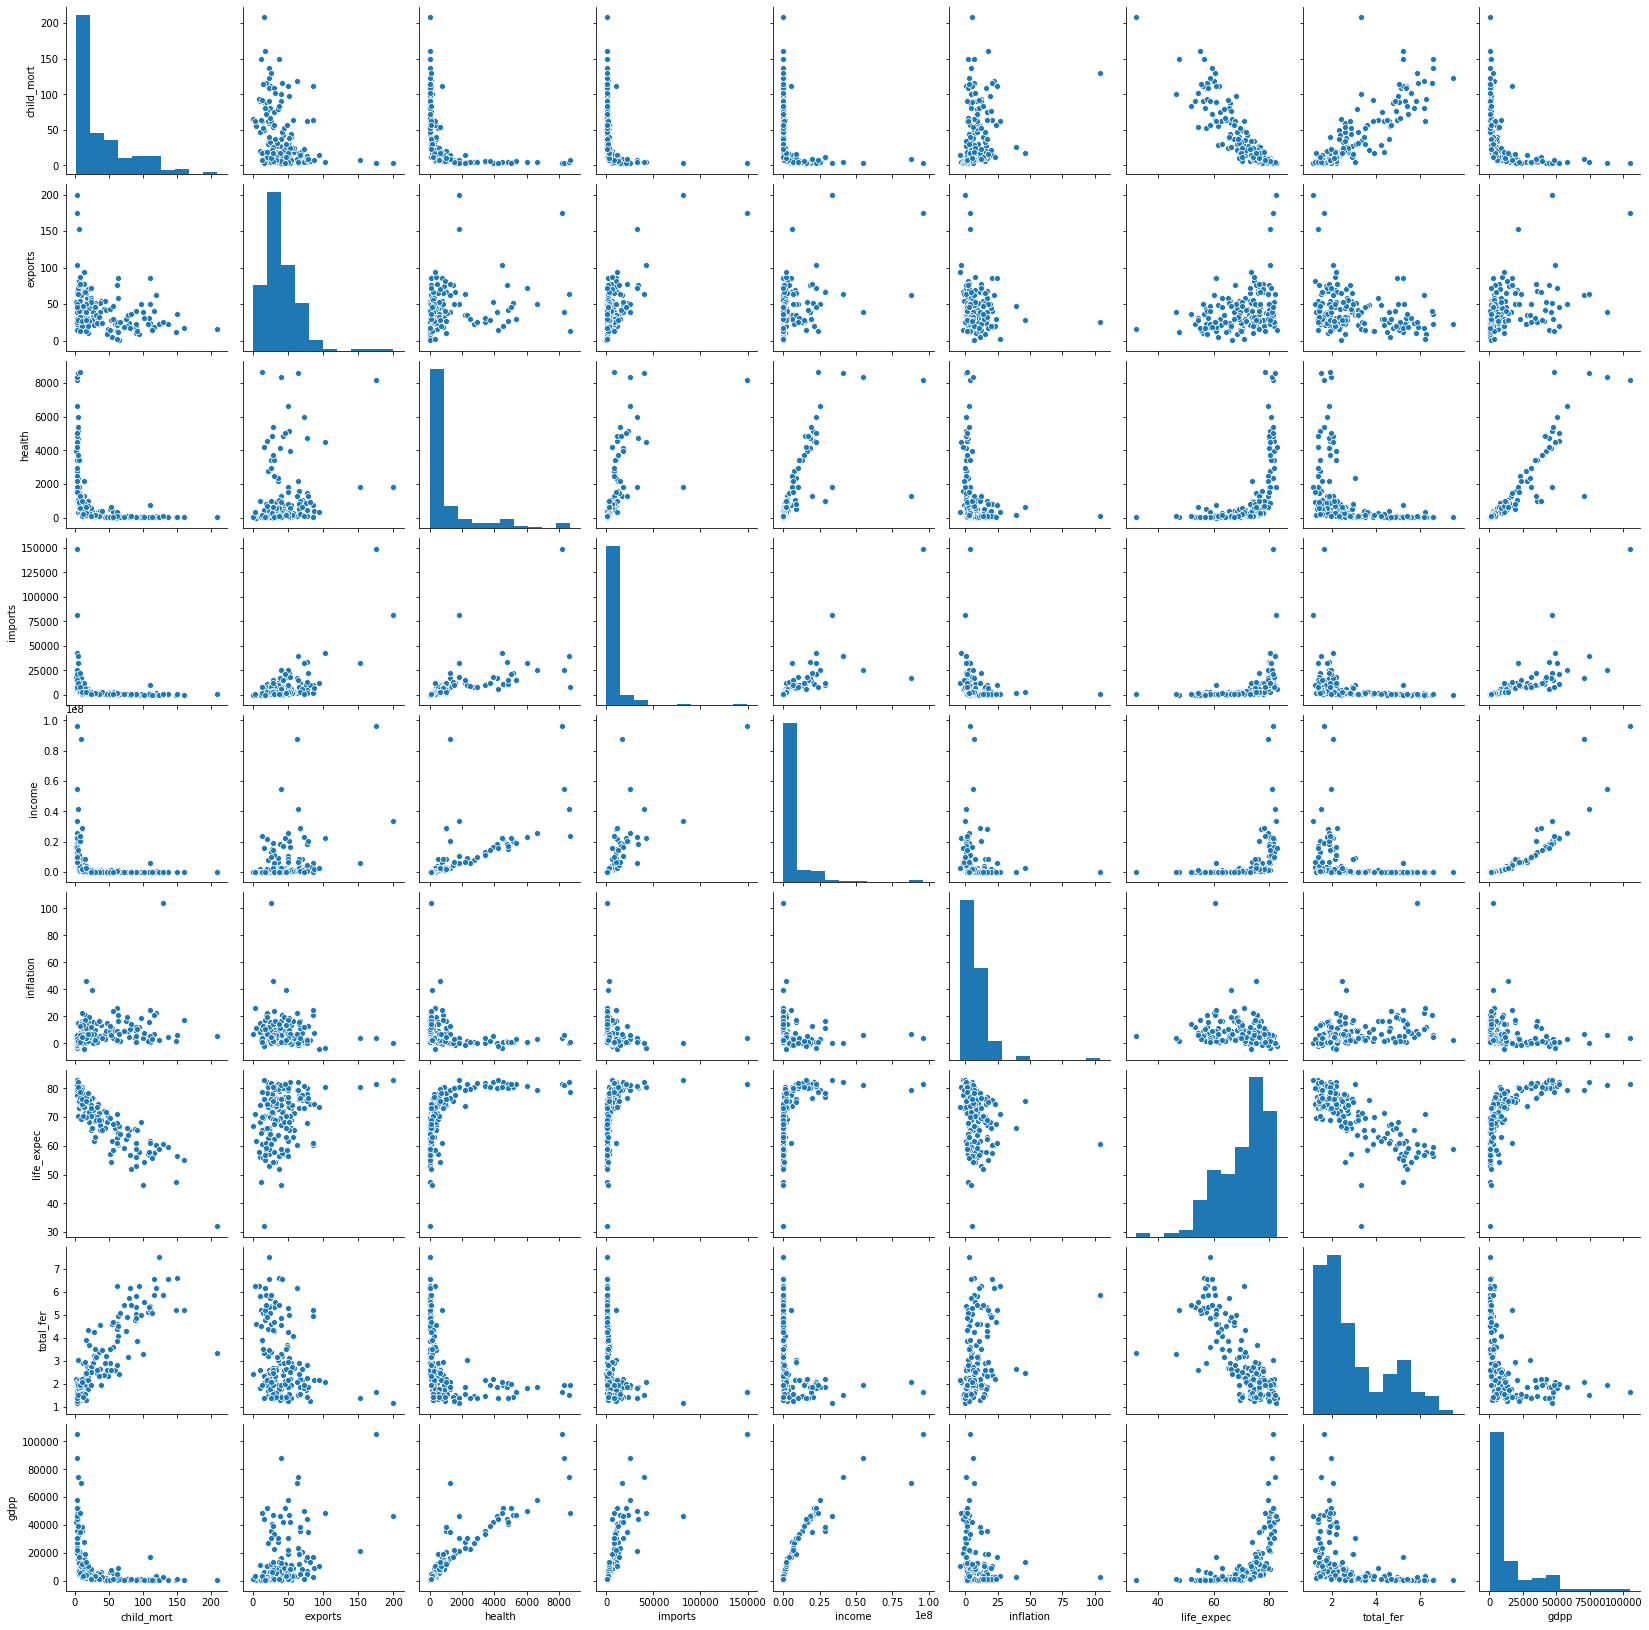

In [253]:
# Plotting a pairplot for all numeric columns
sns.pairplot(df)
plt.show()

Let us plot a heat map using the correlation matrix for all numeric attributes to clearly identify the dependencies.

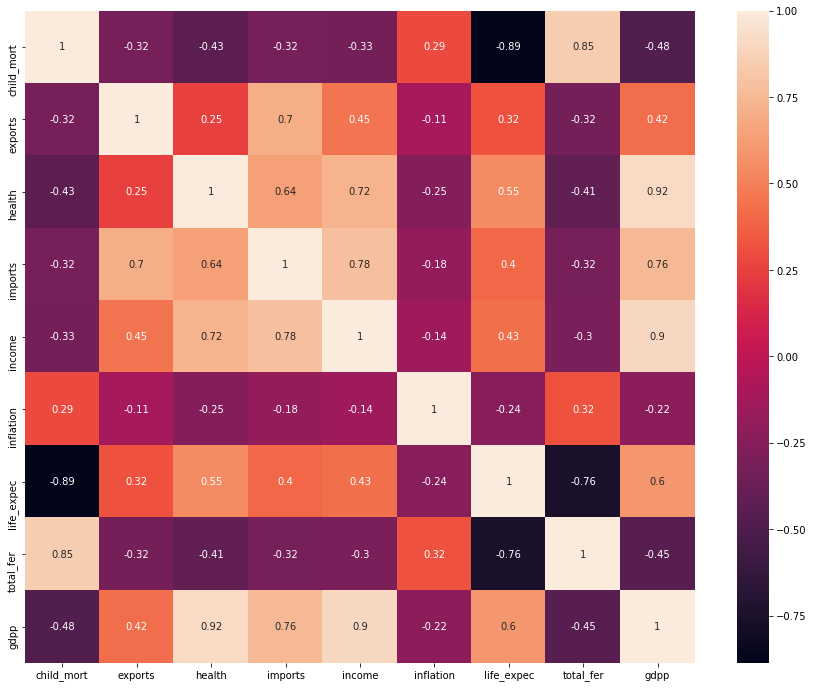

In [254]:
# Plotting heatmap to find the correlation among attributes

plt.figure(figsize = (15,12))
sns.heatmap(df.corr(), annot  = True)
plt.show()

<b> Inferences:

From the above heatmap, we can deduce that there are some attribute that have high correlation among them. We have the option to drop those attributes. But this way, we may lose some information that tends to be very important for our analysis.

So, lets do PCA (Principal Component Analysis) to handle this issue of multicollinearity in the data. Doing this, the multicollinearity can be properly handled without losing or compromising any important information.

### Scaling the data

Two commonly used scaling methods are:
1. Min-Max scaling
2. Sandardization
I'm using Sandardization in this analysis. (Mean = 0, sigma = 1)

In [255]:
# Importing libraries for Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [256]:
scaler = StandardScaler()

In [257]:
# Scaling the data
df_scaled = scaler.fit_transform(df_no_country)
df_scaled = pd.DataFrame(df_scaled, columns = df_no_country.columns)

df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### Principal Component Analysis (PCA)

In [258]:
# Creating an object for PCA
pca = PCA(svd_solver = "randomized", random_state = 42)

# Fitting the dataset with PCA object
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

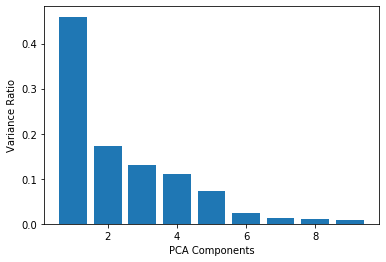

In [259]:
# Plotting bar graph of Variance ratio for each PCA component
plt.bar(range(1, len(pca.explained_variance_ratio_)+1) , pca.explained_variance_ratio_)
plt.xlabel("PCA Components")
plt.ylabel("Variance Ratio")
plt.show()

<b> Inferences:</b>
- First component itself explains more than 50% variance
- Second component, variance explained is almost 20%

Let us now plot a Scree plot to visualize the cumulative variance against the number of components.

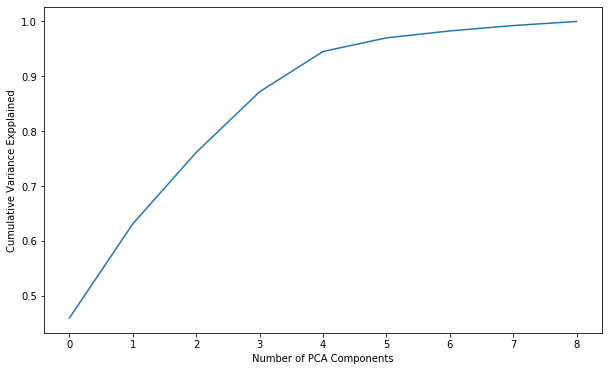

In [260]:
# Plotting Scree plot
plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.vlines(x = 3, ymax = 1, ymin = 0, color = "r", linestyles = "--")
#plt.hlines(y = 0.925, xmax = 8, xmin = 0, color = "g", linestyles = "--")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Variance Expplained")
plt.show()

<b> Inferences:</b>

From the above scree plot, it is clear that first 3 principal components are explaining more than 90% variance. So we will use only these three components for clustering the data.

In [261]:
# Checking the attributes that are well explained by PCA components 

col_list = list(df_no_country.columns)
pca_attributes = pd.DataFrame({"Attribute": col_list, "PC_1":pca.components_[0],
                              "PC_2":pca.components_[1], "PC_3":pca.components_[2]})

In [262]:
pca_attributes

,Attribute,PC_1,PC_2,PC_3
0,child_mort,-0.419519,0.192884,-0.029544
1,exports,0.283897,0.613163,0.144761
2,health,0.150838,-0.243087,-0.596632
3,imports,0.161482,0.671821,-0.299927
4,income,0.398441,0.022536,0.301548
5,inflation,-0.193173,-0.008404,0.642520
6,life_expec,0.425839,-0.222707,0.113919
7,total_fer,-0.403729,0.155233,0.019549
8,gdpp,0.392645,-0.046022,0.122977


Let us first plot a pair plot for PC_1 and PC_2 and visualize the data.

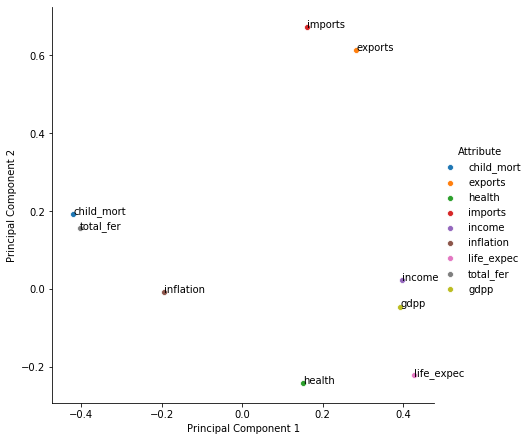

In [263]:
sns.pairplot(data = pca_attributes, x_vars = ["PC_1"], y_vars = ["PC_2"], hue = "Attribute", height = 6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

for i,txt in enumerate(pca_attributes.Attribute):
    plt.annotate(txt, (pca_attributes.PC_1[i], pca_attributes.PC_2[i]))

<b> Inferences:</b>

- "child mortality" and "total fertility" are well explained by PC_2
- "Life expectency", "exports", "gdpp" and "health" are well explained by PC_1
- "imports" and "income" are well explained by both PC_1 and PC_2
- "inflation" is not very well explained by either PC_1 or PC_2.


Let us plot a pair plot with PC_1 and PC_3 to check which explains "inflation" well.

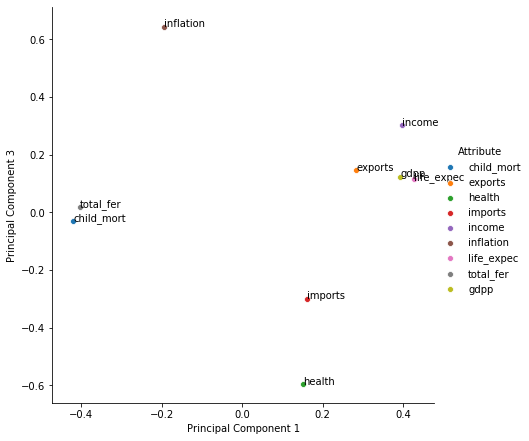

In [264]:
# Pair plot for PC_1 and PC_3

sns.pairplot(data = pca_attributes, x_vars = ["PC_1"], y_vars = ["PC_3"], hue = "Attribute", height = 6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")

for i, txt in enumerate(pca_attributes.Attribute):
    plt.annotate(txt, (pca_attributes.PC_1[i], pca_attributes.PC_3[i]))

From the above pair plot, we can infer that "inflation" is well explained by PC_3.

As we visualized that 90% of the variance is explained by three principal components, let us now build a dataframe using only these 3 components.

In [265]:
# Building the dataframe using Incremental PCA for better efficiency

inc_pca = IncrementalPCA(n_components = 3)

In [266]:
# Fitting out scaled dataframe (df_scaled) on incremental PCA

df_inc_pca = inc_pca.fit_transform(df_scaled)
#df_inc_pca

In [267]:
# Creating a new dataframe with only principal components

df_pca_0 = pd.DataFrame(df_inc_pca, columns = ["PC_1", "PC_2", "PC_3"])
df_pca = pd.concat([df_country, df_pca_0] , axis = 1)
df_pca.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.917491,0.006782,1.149719
1,Albania,0.427164,-0.849421,-0.524328
2,Algeria,-0.270015,-0.176265,-1.555131
3,Angola,-2.928291,2.207142,-0.427484
4,Antigua and Barbuda,1.026479,-0.071315,-0.286053


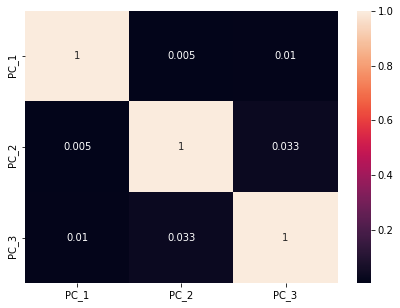

In [268]:
# Checking dependencies, if any, in our new data frame.

plt.figure(figsize = (7,5))
sns.heatmap(df_pca.corr() , annot = True)
plt.show()

From the above heatmap, it is clear that there is no correlation among the attributes. So we can proceed with this dataframe.

### Outlier Analysis

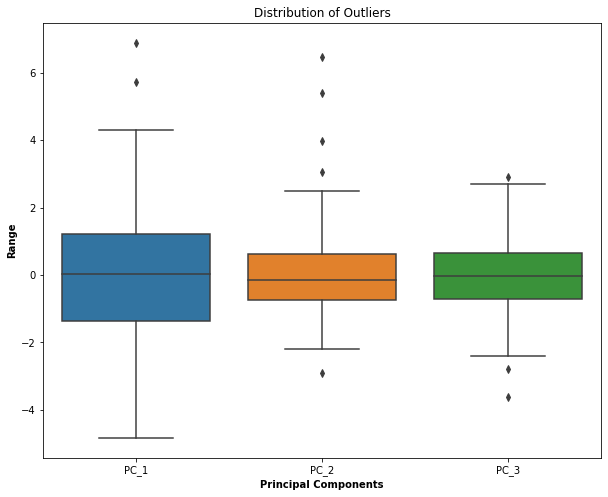

In [269]:
outliers = ["PC_1","PC_2","PC_3"]
plt.figure(figsize = (10,8))
sns.boxplot(data = df_pca[outliers], orient = "v")
plt.title("Distribution of Outliers")
plt.xlabel("Principal Components", fontweight = "bold")
plt.ylabel("Range", fontweight = "bold")
plt.show()

<b> Inferences: </b>

We certainly can find few outliers in the data, from the above boxplot. Since we are working to find the countries that arein dire need of aid, we are not ready to lose any kind of data and would like to analyse as it is.

##### So, considering the business need, we are not removing any outliers here.

In [270]:
# Reindexing the dataframe afer outlier analysis.

df_pca = df_pca.reset_index(drop = True)
df_pca_data = df_pca.drop(["country"], axis = 1)
#df_pca.head()

In [271]:
#df_pca_data.head()

### Model Building

### 1. K-Means Clustering

Let us first perform clustering using K-means clustering algorithm. To do this, we first need to randomly choose the value of "k" i.e., the initial number of clusters.

Elbow method and silhouette method are two widely used methods to determine the ideal value for initial number of clusters (k).

In [272]:
#Importing libraries for Clustering

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### 1. Elbow curve:

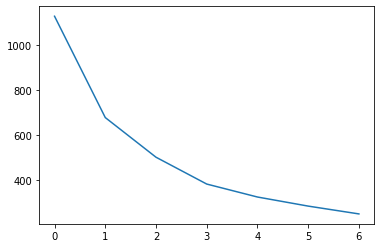

In [273]:
# Calculating with-in sum of squares distance and plotting it for each datapoint

wss = []
for i in list(range(1,8)):
    init_clust = KMeans(n_clusters = i , max_iter = 50, random_state = 100)
    init_clust.fit(df_pca_data)
    wss.append(init_clust.inertia_)
plt.plot(wss)
plt.show()

From the above elbow curve, we can consider 3 or 4 as the initial value of K i.e., initial number of clusters.

#### 2. Silhouette Score Analysis:

In [274]:
init_clust_range = [2,3,4,5,6,7,8]
for i in init_clust_range:
    kmeans = KMeans(n_clusters = i, max_iter = 50, random_state = 100)
    kmeans.fit(df_pca_data)
    cluster_labels = kmeans.labels_
    
    # Calculating Silhouette score
    sil_avg = silhouette_score(df_pca_data, cluster_labels)
    print("For cluster number: {0}, the silhouette score is: {1}".format(i, sil_avg))

For cluster number: 2, the silhouette score is: 0.36624838761613165
For cluster number: 3, the silhouette score is: 0.3354051845452397
For cluster number: 4, the silhouette score is: 0.32964515913127107
For cluster number: 5, the silhouette score is: 0.3279303698261751
For cluster number: 6, the silhouette score is: 0.29271551046892075
For cluster number: 7, the silhouette score is: 0.30074259652014174
For cluster number: 8, the silhouette score is: 0.2826167106918708


##### Clustering the data with 4 clusters (k = 4)

In [275]:
clust_4 = KMeans(n_clusters = 4, max_iter = 50, random_state = 100)
clust_4.fit(df_pca_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [276]:
clust_4.labels_

array([2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2,
       2, 0, 1, 3, 0, 2, 2, 0, 1, 2, 3, 2, 0, 2, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1,
       2, 3, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [277]:
# appending these cluster labels to our dataframe

df_pca["Clust_4 ID"] = clust_4.labels_
df_pca.head()

,country,PC_1,PC_2,PC_3,Clust_4 ID
0,Afghanistan,-2.917491,0.006782,1.149719,2
1,Albania,0.427164,-0.849421,-0.524328,0
2,Algeria,-0.270015,-0.176265,-1.555131,0
3,Angola,-2.928291,2.207142,-0.427484,2
4,Antigua and Barbuda,1.026479,-0.071315,-0.286053,1


In [278]:
# Checking number of countries in each cluster
df_pca["Clust_4 ID"].value_counts()

0    66
1    51
2    47
3     3
Name: Clust_4 ID, dtype: int64

We can see that not many countries are in cluster 3.

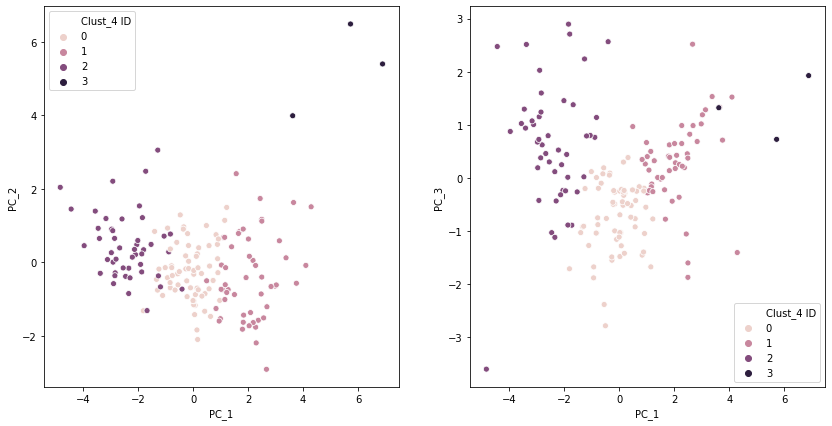

In [279]:
# Let's visualize the spread of data based on Principal components

fig, axes = plt.subplots(1,2,figsize = (14,7))
sns.scatterplot(data = df_pca, x = "PC_1", y = "PC_2", hue = "Clust_4 ID", ax = axes[0])
sns.scatterplot(data = df_pca, x = "PC_1", y = "PC_3", hue = "Clust_4 ID", ax = axes[1])
plt.show()

<B> Inferences: </B>

1. From first plot, we can see that clusters 0 & 2 are overlapping to some extent, which is not a good sign of clustering.
2. In the second plot, the clusters can be clearly distinguished.

Lets drop the "Clust_4 ID" column in our dataframe and try clustering with 3 clusters.

In [280]:
# Dropping "Clust_4 ID"
df_pca = df_pca.drop("Clust_4 ID", axis = 1)

##### Clustering the data with 5 clusters (k = 5)

In [281]:
clust_5 = KMeans(n_clusters = 5, max_iter = 50, random_state = 100)
clust_5.fit(df_pca_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [282]:
#Appending cluster labels in the dataframe

df_pca["Clust_5 ID"] = clust_5.labels_
df_pca.head()

,country,PC_1,PC_2,PC_3,Clust_5 ID
0,Afghanistan,-2.917491,0.006782,1.149719,3
1,Albania,0.427164,-0.849421,-0.524328,2
2,Algeria,-0.270015,-0.176265,-1.555131,2
3,Angola,-2.928291,2.207142,-0.427484,3
4,Antigua and Barbuda,1.026479,-0.071315,-0.286053,0


In [283]:
# Checking number of countries in each cluster
df_pca["Clust_5 ID"].value_counts()

2    59
3    47
1    34
0    24
4     3
Name: Clust_5 ID, dtype: int64

We can see that except in cluster ID 4, there are fairly good number of countries in each cluster.

Let us plot scatter plots and check the spread of data

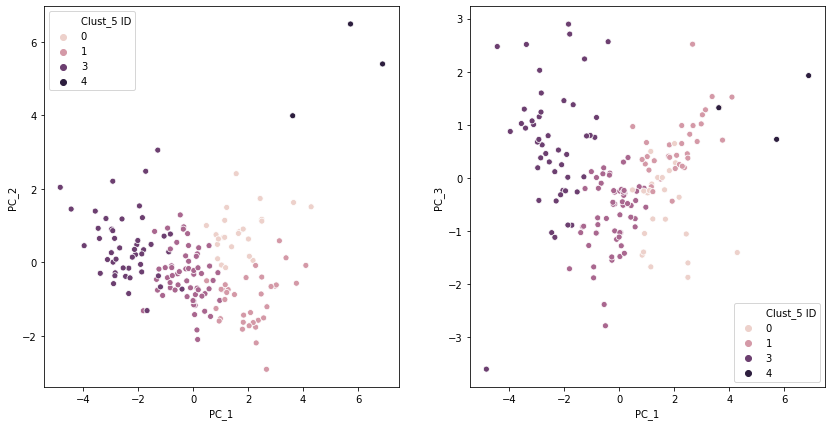

In [284]:
# Let's visualize the spread of data based on Principal components

fig, axes = plt.subplots(1,2,figsize = (14,7))
sns.scatterplot(data = df_pca, x = "PC_1", y = "PC_2", hue = "Clust_5 ID", ax = axes[0])
sns.scatterplot(data = df_pca, x = "PC_1", y = "PC_3", hue = "Clust_5 ID", ax = axes[1])
plt.show()

<b> Inferences: </b>
The overlapping of clusters is still seen, like we found when considering 4 clusters is addressed here.

Let us try clustering the countries into 3 clusters and see if we can deduce meaningful information.

##### Clustering the data with 3 clusters (k = 3)

In [285]:
# Let us first drop "Clust_5 ID" from our data frame
df_pca = df_pca.drop("Clust_5 ID", axis = 1)

In [286]:
# K-means with 3 clusters

clust_3 = KMeans(n_clusters = 3, max_iter = 50, random_state = 100)
clust_3.fit(df_pca_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [287]:
# Assigning cluster lables to the countries in our data frame

df_pca["Clust_3 ID"] = clust_3.labels_
df_pca.head()

,country,PC_1,PC_2,PC_3,Clust_3 ID
0,Afghanistan,-2.917491,0.006782,1.149719,0
1,Albania,0.427164,-0.849421,-0.524328,1
2,Algeria,-0.270015,-0.176265,-1.555131,1
3,Angola,-2.928291,2.207142,-0.427484,0
4,Antigua and Barbuda,1.026479,-0.071315,-0.286053,1


In [288]:
# Checking number of countries in each cluster

df_pca["Clust_3 ID"].value_counts()

1    79
0    47
2    41
Name: Clust_3 ID, dtype: int64

We can see that there are good number of clusters in all the clusters. Let us plot a sctter plot to visualize the spread of data.

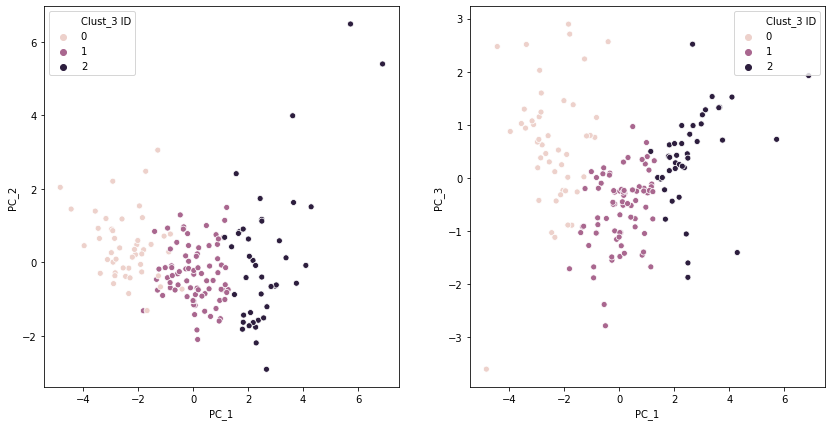

In [289]:
# Plotting Scatter plot
fig, axes = plt.subplots(1,2,figsize = (14,7))
sns.scatterplot(data = df_pca, x = "PC_1", y = "PC_2", hue = "Clust_3 ID", ax = axes[0])
sns.scatterplot(data = df_pca, x = "PC_1", y = "PC_3", hue = "Clust_3 ID", ax = axes[1])
plt.show()

Clustering the countries into 3 clusters is dropping off a segment. But looking at the scatter plot, we can say that some results are good. Also, let us try visualizing the data on original attributes considering 3 clusters and see if we can deduce good information about the countries that are in dire need of help.

In [290]:
# Merging the dataframe with Pincipal components and the original dataframe
merged_df = pd.merge(df, df_pca, on = "country")
merged_df_col = merged_df[["country", "child_mort", "exports", "imports", "health", "income", "inflation", "life_expec",
                          "total_fer", "gdpp", "Clust_3 ID"]]

# Creating the dataframe with the "mean" values

clust_child = pd.DataFrame(merged_df_col.groupby(["Clust_3 ID"]).child_mort.mean())
clust_exports = pd.DataFrame(merged_df_col.groupby(["Clust_3 ID"]).exports.mean())
clust_imports = pd.DataFrame(merged_df_col.groupby(["Clust_3 ID"]).imports.mean())
clust_health = pd.DataFrame(merged_df_col.groupby(["Clust_3 ID"]).health.mean())
clust_income = pd.DataFrame(merged_df_col.groupby(["Clust_3 ID"]).income.mean())
clust_inflation = pd.DataFrame(merged_df_col.groupby(["Clust_3 ID"]).inflation.mean())
clust_lifeexpec = pd.DataFrame(merged_df_col.groupby(["Clust_3 ID"]).life_expec.mean())
clust_totalfer = pd.DataFrame(merged_df_col.groupby(["Clust_3 ID"]).total_fer.mean())
clust_gdpp = pd.DataFrame(merged_df_col.groupby(["Clust_3 ID"]).gdpp.mean())

In [291]:
# Concatinating above created dataframes that contain mean values to the 5 clusters.

df_concat = pd.concat([pd.Series([0,1,2]) , clust_child, clust_exports, clust_imports, clust_health, clust_income,
                       clust_inflation, clust_lifeexpec, clust_totalfer, clust_gdpp] , axis = 1)
df_concat.columns = ["Cluster ID", "Child Mortality", "Exports", "Imports", "Spending on Health", "Income", "Inflation",
                    "Life Expectancy", "Total Fertility", "GDP Percapita"]
df_concat.head()

,Cluster ID,Child Mortality,Exports,Imports,Spending on Health,Income,Inflation,Life Expectancy,Total Fertility,GDP Percapita
0,0,92.270213,28.634255,826.079383,111.337547,1.968500e+05,11.539043,59.123404,4.988085,1728.765957
1,1,23.084810,38.212519,2593.027989,392.554435,1.088490e+06,8.306785,72.715190,2.348228,6270.658228
2,2,5.626829,60.990244,20892.191707,3420.238537,1.954238e+07,2.463293,79.500000,1.764878,38740.975610


We can observe from the above dataframe that contries lying in cluster ID 1 are looking to be less developed comparitively and they may need help.
Let us first visualize the spread of the data before drawing any conclusions.

We have learnt from the business understanding that " Child Mortality", "Income" and "GDP Percapita" are important factor in determining the development of countries. So let us analyze these three attributes to bulid clusters.

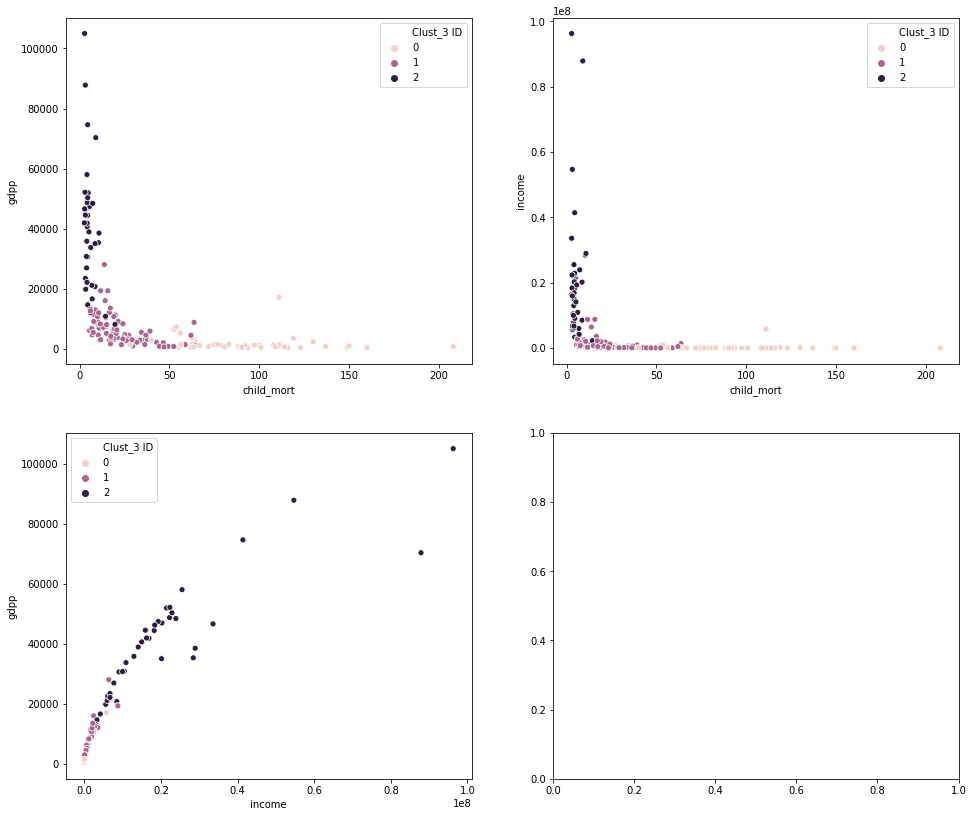

In [292]:
# Plotting scatter plot on original attributes

fig, axes = plt.subplots(2,2, figsize = (16,14))
sns.scatterplot(data = merged_df_col, x = "child_mort", y = "gdpp" , hue = "Clust_3 ID", ax = axes[0][0])
sns.scatterplot(data = merged_df_col, x = "child_mort", y = "income" , hue = "Clust_3 ID", ax = axes[0][1])
sns.scatterplot(data = merged_df_col, x = "income", y = "gdpp" , hue = "Clust_3 ID", ax = axes[1][0])

<b> Inferences: </b>

- It is clear that the countries are well clusterd with respect to "child_mort" Vs "gdpp". With increasing gdpp, child mortality is reducing.
- Visualizing the data of "child_mort" with respect to "income" is also giving good insights. Countries with higher income have lesser child mortality rate.

Since we are able to identify the develpoment of countries when clustering them into 3 clusters, let us build our model with only three clusters.

That way, we can also achieve specificity and thus no issue of dropping out the countries that are also in need of help.

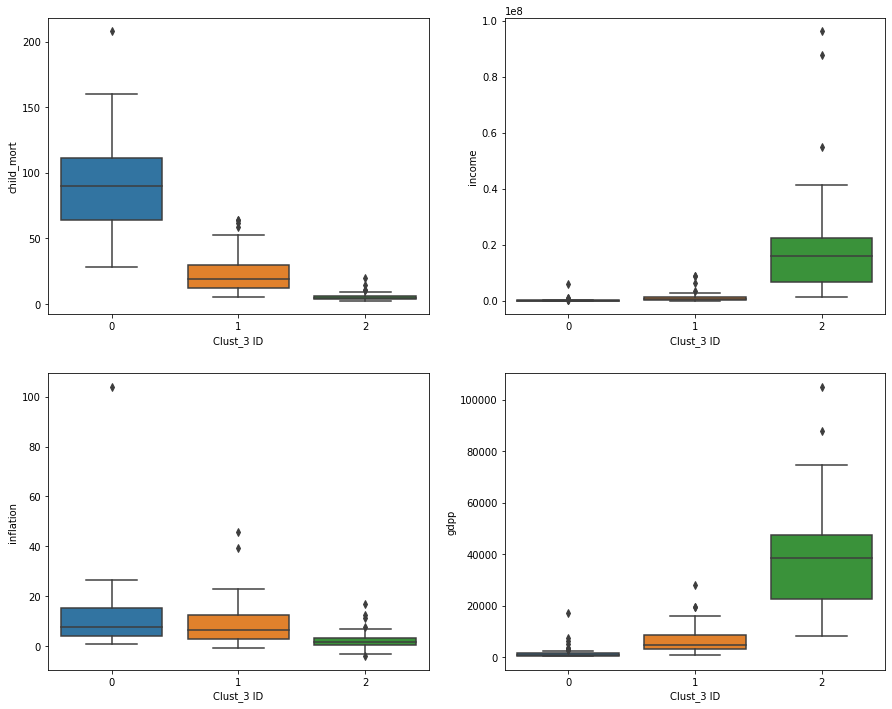

In [293]:
# Plotting boxplot on attributes "child_mort", "income", "inflation" and "gdpp"

fig,axes = plt.subplots(2,2, figsize = (15,12))
sns.boxplot(data = merged_df_col, x = "Clust_3 ID", y = "child_mort", ax = axes[0][0])
sns.boxplot(data = merged_df_col, x = "Clust_3 ID", y = "income", ax = axes[0][1])
sns.boxplot(data = merged_df_col, x = "Clust_3 ID", y = "inflation", ax = axes[1][0])
sns.boxplot(data = merged_df_col, x = "Clust_3 ID", y = "gdpp", ax = axes[1][1])
plt.show()

<b> Inferences: </b>

1. For Cluster 0: high child mortality rate, low income, comparitively higher inflation than the contries in other clusters and very low gdpp. These clearly prove that these countries are under-developed and need help.

2. For Cluster 1: all the four attributes- child mortality, income, inflation and gdpp are moderate. So these countries are not much of a concern to provide help.

3. For Cluster 2: the countries falling under this cluster have very low child mortality rate, good income, lesser inflation and very good gdpp. These clearly are developed contries. They do not require help from NGO.

<b> Hence we are going to consider those contries that are falling under Cluster 0 to extend help from NGO. </b>

#### Listing out the countries that require help. (Countries in Cluster 0)

In [294]:
countries_final_kmeans = merged_df_col[merged_df_col["Clust_3 ID"] == 0]
countries_final_kmeans.reset_index(drop = True).country

0                  Afghanistan
1                       Angola
2                        Benin
3                     Botswana
4                 Burkina Faso
5                      Burundi
6                     Cameroon
7     Central African Republic
8                         Chad
9                      Comoros
10            Congo, Dem. Rep.
11                 Congo, Rep.
12               Cote d'Ivoire
13           Equatorial Guinea
14                     Eritrea
15                      Gambia
16                       Ghana
17                      Guinea
18               Guinea-Bissau
19                       Haiti
20                       Kenya
21                    Kiribati
22                         Lao
23                     Lesotho
24                     Liberia
25                  Madagascar
26                      Malawi
27                        Mali
28                  Mauritania
29       Micronesia, Fed. Sts.
30                  Mozambique
31                     Namibia
32      

#### Using  K-Means clustering algorithm, we could identify 47 countries as under-developed to extend help by the NGO.

Let us now apply Hierarchical Clustering algorithm on our data and interpret the results to check which algorithm is providing us appropriate results.

### 2. Hierarchical Clustering Algorithm

In [295]:
df_pca_data.head()

,PC_1,PC_2,PC_3
0,-2.917491,0.006782,1.149719
1,0.427164,-0.849421,-0.524328
2,-0.270015,-0.176265,-1.555131
3,-2.928291,2.207142,-0.427484
4,1.026479,-0.071315,-0.286053


#### Trying Single Linkage:

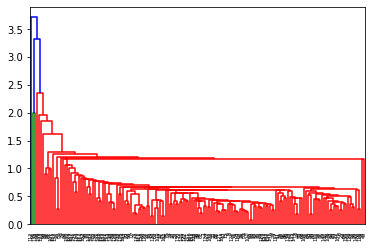

In [296]:
clusters = linkage(df_pca_data , method = "single", metric = "euclidean")
dendrogram(clusters)
plt.show()

#### Trying Complete Linkage

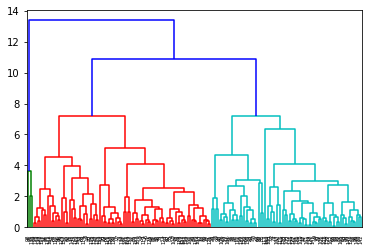

In [297]:
clusters = linkage(df_pca_data , method = "complete", metric = "euclidean")
dendrogram(clusters)
plt.show()

In [298]:
# Creating a new dataframe to apply hierarchical clustering

df_pca_hc = df_pca.copy()
df_pca_hc = df_pca_hc.drop("Clust_3 ID" , axis = 1)
df_pca_hc.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.917491,0.006782,1.149719
1,Albania,0.427164,-0.849421,-0.524328
2,Algeria,-0.270015,-0.176265,-1.555131
3,Angola,-2.928291,2.207142,-0.427484
4,Antigua and Barbuda,1.026479,-0.071315,-0.286053


In [299]:
# Let us cut the dendrogram to form 4 clusters

clust_cut = pd.Series(cut_tree(clusters, n_clusters = 4).reshape(-1,))
df_hc = pd.concat([df_pca_hc, clust_cut] , axis = 1)
df_hc.columns = ["country", "PC_1", "PC_2", "PC_3", "Clust_3 ID"]

In [300]:
df_hc.head()

,country,PC_1,PC_2,PC_3,Clust_3 ID
0,Afghanistan,-2.917491,0.006782,1.149719,0
1,Albania,0.427164,-0.849421,-0.524328,1
2,Algeria,-0.270015,-0.176265,-1.555131,2
3,Angola,-2.928291,2.207142,-0.427484,0
4,Antigua and Barbuda,1.026479,-0.071315,-0.286053,1


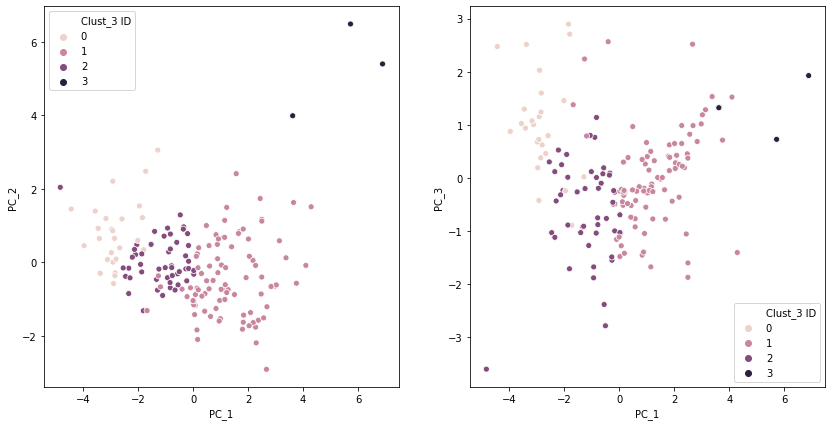

In [301]:
# Plotting Scatter plot on principal components

fg, axes = plt.subplots(1,2, figsize = (14,7))
sns.scatterplot(data = df_hc, x = "PC_1", y = "PC_2", hue = "Clust_3 ID", ax = axes[0])
sns.scatterplot(data = df_hc, x = "PC_1", y = "PC_3", hue = "Clust_3 ID", ax = axes[1])
plt.show()

We can observe that the clusters are not properly formed inthis case.
So let us merge the dataframe of principal components with the original dataframe and visualize the spread of data to derive meaningful insights.

In [302]:
merged_df_hc = pd.merge(df, df_hc, on = "country")
merged_df_col_hc = merged_df[["country", "child_mort", "exports", "imports", "health", "income",
                             "inflation", "life_expec", "total_fer", "gdpp", "Clust_3 ID"]]
merged_df_col_hc.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Clust_3 ID
0,Afghanistan,90.2,10.0,248.297,41.9174,8903.3,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,1987.740,267.8950,406137.0,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,1400.440,185.9820,575340.0,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,1514.370,100.6050,208270.0,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,7185.800,735.6600,2330200.0,1.44,76.8,2.13,12200,1


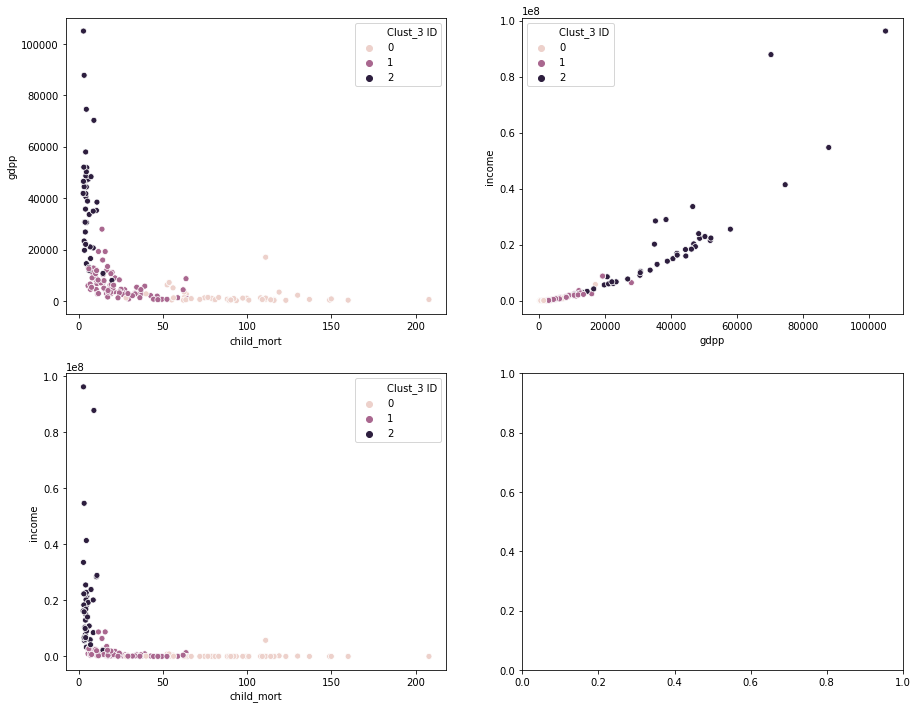

In [303]:
# Plotting scatter plot on original attributes

fig, axes = plt.subplots(2,2, figsize = (15,12))
sns.scatterplot(data = merged_df_col_hc, x = "child_mort", y = "gdpp", hue = "Clust_3 ID", ax = axes[0][0])
sns.scatterplot(data = merged_df_col_hc, x = "gdpp", y = "income", hue = "Clust_3 ID", ax = axes[0][1])
sns.scatterplot(data = merged_df_col_hc, x = "child_mort", y = "income", hue = "Clust_3 ID", ax = axes[1][0])
plt.show()

<b> Inferences: </b>

- Clusters formed are almost non-overlapping.
- It is clear from above scatter plots that as the gdpp increases, the child mortality rate is decreasing.
- The countries with higher income observe lower child mortalities
- income is increasing with gdpp and those countries with higher gdpp have higher values of income.

Let us plot boxplot to check the clusters inidvidually and then deduce inferences from that.

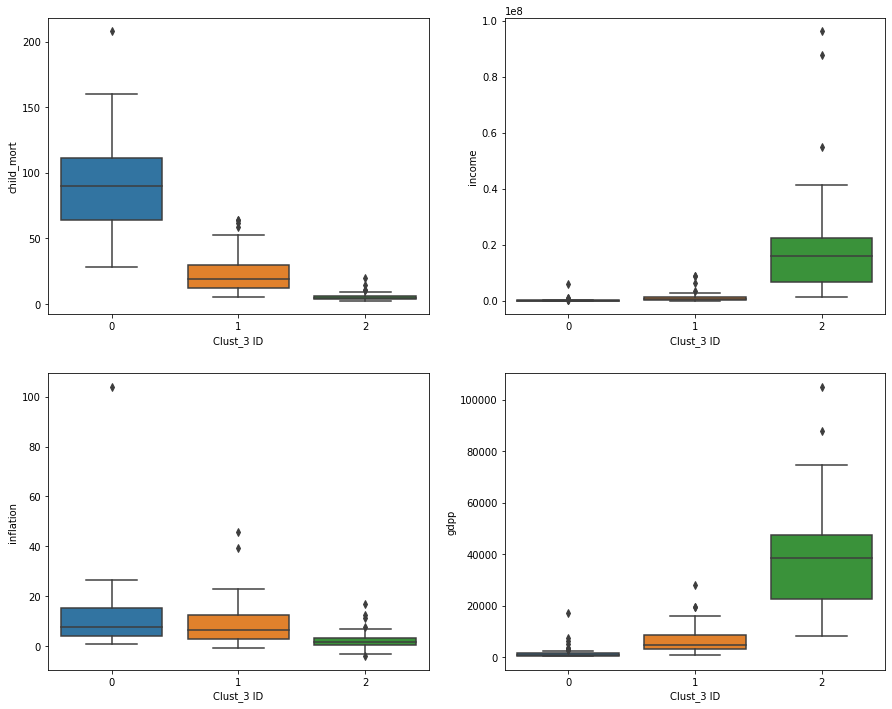

In [304]:
# Plotting boxplot on attributes "child_mort", "income", "inflation" and "gdpp"

fig,axes = plt.subplots(2,2, figsize = (15,12))
sns.boxplot(data = merged_df_col_hc, x = "Clust_3 ID", y = "child_mort", ax = axes[0][0])
sns.boxplot(data = merged_df_col_hc, x = "Clust_3 ID", y = "income", ax = axes[0][1])
sns.boxplot(data = merged_df_col_hc, x = "Clust_3 ID", y = "inflation", ax = axes[1][0])
sns.boxplot(data = merged_df_col_hc, x = "Clust_3 ID", y = "gdpp", ax = axes[1][1])
plt.show()

<b> Inferences: </b>

From the above boxplot we see that the results of Hierarchical clustering are almost similar to those observed with K-Means clustering algorithm.

<b> One major difference we observed between results of hierarchical clustering and K-means clustering is that the "income" and "gdpp" are well clusterd/ explained using k-Means clustering algorithm than hierarchical clustering.
So let us consider K-Means clustering algorithm in this analysis and do our final analysis to identify the countries that are in the direst need of aid. </b>

### Final Analysis.

We got countries that are in need of aid in the Cluster 0. Let us now make a list of those countries.

In [305]:
final_df = merged_df_col[merged_df_col["Clust_3 ID"] == 0]
final_df.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Clust_3 ID
0,Afghanistan,90.2,10.0,248.297,41.9174,8903.3,9.440,56.2,5.82,553,0
3,Angola,119.0,62.3,1514.370,100.6050,208270.0,22.400,60.1,6.16,3530,0
17,Benin,111.0,23.8,281.976,31.0780,13795.6,0.885,61.8,5.36,758,0
21,Botswana,52.5,43.6,3257.550,527.0500,844550.0,8.920,57.1,2.88,6350,0
25,Burkina Faso,116.0,19.2,170.200,38.7550,8222.5,6.810,57.9,5.87,575,0


In [306]:
final_df.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Clust_3 ID
count,47.000000,47.000000,47.000000,47.000000,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.0
mean,92.270213,28.634255,826.079383,111.337547,1.968500e+05,11.539043,59.123404,4.988085,1728.765957,0.0
std,34.335309,17.862040,1564.846035,165.881467,8.491789e+05,15.539285,6.387155,1.061086,2751.402703,0.0
min,28.100000,2.200000,90.552000,12.821200,1.764840e+03,0.885000,32.100000,2.590000,231.000000,0.0
25%,63.750000,16.950000,193.061000,33.329850,7.601900e+03,3.835000,56.650000,4.440000,550.000000,0.0
50%,90.200000,23.800000,324.912000,50.958000,1.731210e+04,7.640000,59.500000,5.060000,897.000000,0.0
75%,111.000000,36.900000,667.845000,89.765000,4.663000e+04,15.050000,62.500000,5.635000,1385.000000,0.0
max,208.000000,85.800000,10071.900000,766.080000,5.762700e+06,104.000000,71.100000,7.490000,17100.000000,0.0


Let us consider the "mean" values of attributes "child mortality", "income" and "gdpp" from the above result to make our final list of countries that are in need of aid.

In [307]:
# Listing out those countries whose "child mortality" rate is more than average.
final_df_1 = df[df["child_mort"] > 92]
final_df_1.shape

(21, 10)

In [308]:
final_df_1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,21.000000,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.000000,21.000000,21.000000
mean,121.704762,30.724762,83.584857,850.461429,3.032356e+05,14.191667,56.547619,5.431905,1708.190476
std,27.164489,19.073261,159.534694,2143.001506,1.251862e+06,21.894914,7.401798,1.042999,3607.677295
min,92.100000,8.920000,17.750800,90.552000,1.764840e+03,0.885000,32.100000,3.300000,231.000000
25%,108.000000,16.800000,26.796000,170.868000,4.867800e+03,4.150000,55.600000,5.110000,446.000000
50%,114.000000,23.800000,40.634100,279.936000,1.323960e+04,6.810000,57.700000,5.340000,708.000000
75%,130.000000,39.400000,64.660000,428.314000,3.484600e+04,17.200000,60.100000,6.160000,1200.000000
max,208.000000,85.800000,766.080000,10071.900000,5.762700e+06,104.000000,68.200000,7.490000,17100.000000


In [309]:
# Listing out the countries with below average "GDP Percapita"
final_df_2 = final_df_1[final_df_1["gdpp"] <= 1708]
final_df_2.shape

(18, 10)

In [310]:
final_df_2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,121.988889,26.212222,42.803667,326.000000,15387.923333,8.151389,55.888889,5.381111,717.333333
std,29.271566,12.946827,26.354745,268.357432,14123.977826,6.340505,7.824313,1.110500,344.785526
min,92.100000,8.920000,17.750800,90.552000,1764.840000,0.885000,32.100000,3.300000,231.000000
25%,102.750000,15.675000,26.513550,170.367000,4187.310000,3.265000,55.150000,5.065000,425.750000
50%,112.500000,22.500000,37.006700,225.134000,9076.250000,5.920000,57.400000,5.305000,655.000000
75%,133.500000,35.475000,50.825500,381.071250,25212.525000,11.950000,58.600000,6.162500,1004.250000
max,208.000000,50.700000,129.870000,1181.700000,44512.000000,20.800000,68.200000,7.490000,1310.000000


In [311]:
# List of countries with below average "income"
final_df_3 = final_df_2[final_df_2["income"] <= 15388]
final_df_3.shape

(12, 10)

In [312]:
final_df_3.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,128.133333,21.551667,32.691575,206.498750,6650.710000,8.257083,54.658333,5.646667,506.250000
std,31.647414,9.198638,11.374246,91.777637,4131.493638,6.704942,7.930088,1.032863,167.342939
min,93.600000,8.920000,17.750800,90.552000,1764.840000,0.885000,32.100000,3.330000,231.000000
25%,110.500000,15.200000,25.272025,158.661750,3592.995000,2.865000,54.875000,5.207500,386.250000
50%,116.000000,20.700000,31.512200,181.706000,6235.550000,6.130000,57.600000,5.460000,496.500000
75%,140.000000,25.425000,40.502300,256.365000,8649.375000,13.250000,58.200000,6.330000,651.500000
max,208.000000,41.100000,52.269000,428.314000,13795.600000,20.800000,61.800000,7.490000,758.000000


Let us now list out the countries in our latest dataframe. <b> This List represents the final list of Countries that are in direst need of aid, based on socio-economic standards. </b>

In [313]:
final_df_3.reset_index(drop = True).country

0                        Benin
1                 Burkina Faso
2                      Burundi
3     Central African Republic
4             Congo, Dem. Rep.
5                       Guinea
6                Guinea-Bissau
7                        Haiti
8                         Mali
9                   Mozambique
10                       Niger
11                Sierra Leone
Name: country, dtype: object

### Conclusion:

<b> From the business understanding, we identified few factors like child mortality, GDP Percapita, income, etc as vital attributes to determine the socio-economic standard of each country.
    We used Principal Component Analysis (PCA) to handle multicollinearity present in our data and also to reduce the dimensions.Followed by clustering the countries based on their development status.
    We succeeded in identifying 12 countries that are in direst need of aid. This list is subject to changes as it is based on few factors like number of clusters chosen, number of attributes considered based on business understanding, the clustering algorithm used to build the model. </b>